<a href="https://colab.research.google.com/github/Erikchavez1102/2048-python-para-data-science-trabajar-con-funciones/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
import pandas as pd
# ¡Hola! Vamos a analizar los productos más vendidos utilizando algunas funciones básicas de Python.
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Ahora, para encontrar los productos más vendidos, necesitamos contar cuántas veces aparece cada producto
conteo_productos = todas_las_tiendas['Producto'].value_counts()

print("Los 10 productos más vendidos son:")
print(conteo_productos.head(10))

# Creamos una lista de los nombres de los productos usando el índice de la Serie `conteo_productos`.
nombres_productos = list(conteo_productos.index)
print("\nLista de nombres de productos (los más vendidos primero):")
print(nombres_productos[:10]) # Mostramos los primeros 10

# Creamos una lista de la cantidad vendida para cada producto usando los valores de la Serie `conteo_productos`.
cantidad_vendida = list(conteo_productos.values)
print("\nLista de cantidad vendida (para los productos de arriba):")
print(cantidad_vendida[:10]) # Mostramos los primeros 10

nombres_mayusculas = list(map(lambda nombre: nombre.upper(), nombres_productos))
print("\nNombres de productos en mayúsculas (primeros 10):")
print(nombres_mayusculas[:10])


Los 10 productos más vendidos son:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64

Lista de nombres de productos (los más vendidos primero):
['Mesa de noche', 'Carrito de control remoto', 'Microondas', 'Batería', 'Cama king', 'Secadora de ropa', 'Modelado predictivo', 'Set de ollas', 'Cama box', 'Bloques de construcción']

Lista de cantidad vendida (para los productos de arriba):
[np.int64(210), np.int64(206), np.int64(206), np.int64(203), np.int64(201), np.int64(200), np.int64(200), np.int64(200), np.int64(199), np.int64(199)]

Nombres de productos en mayúsculas (primeros 10):
['MESA DE NOCHE', 'CARRITO DE CONTROL REMOTO', 'MICROONDAS', 'BATERÍA', 'CAMA KING', 'SECADORA DE

# 2. Ventas por categoría


Ventas totales por categoría:
Categoría del Producto
Electrónicos               1.660576e+09
Electrodomésticos          1.324751e+09
Muebles                    7.576610e+08
Instrumentos musicales     3.487726e+08
Deportes y diversión       1.429777e+08
Juguetes                   7.360440e+07
Artículos para el hogar    5.757980e+07
Libros                     3.769610e+07
Name: Precio, dtype: float64


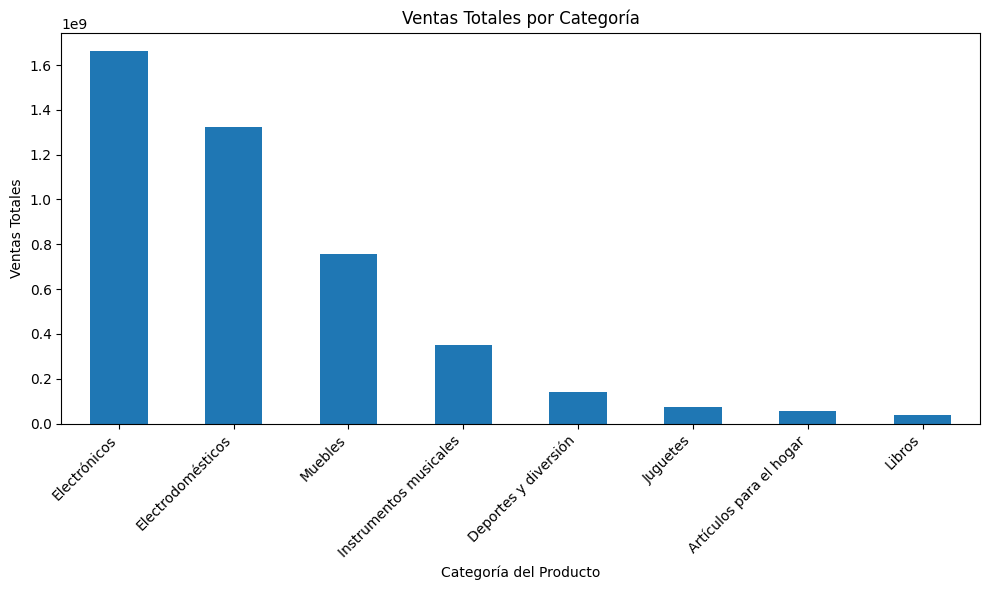

In [7]:
# Para analizar las ventas por categoría, primero necesitamos asegurarnos de que el DataFrame `todas_las_tiendas`
# contenga la columna 'Categoría del Producto' y 'Precio'.

# Asumiendo que existe una columna 'Precio' que representa el valor de la venta por fila:
if 'Categoría del Producto' in todas_las_tiendas.columns and 'Precio' in todas_las_tiendas.columns:
    # Agrupar por categoría y sumar el 'Precio' para obtener las ventas totales por categoría
    ventas_por_categoria = todas_las_tiendas.groupby('Categoría del Producto')['Precio'].sum()

    # Ordenar las categorías por el total de ventas en orden descendente
    ventas_por_categoria = ventas_por_categoria.sort_values(ascending=False)

    print("\nVentas totales por categoría:")
    print(ventas_por_categoria)

    # Para visualizarlo mejor, podemos usar un gráfico de barras
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    ventas_por_categoria.plot(kind='bar')
    plt.title('Ventas Totales por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Ventas Totales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

elif 'Categoría del Producto' not in todas_las_tiendas.columns:
    print("\nEl DataFrame 'todas_las_tiendas' no contiene la columna 'Categoría del Producto'.")
    print("No se puede realizar el análisis de ventas por categoría sin esta información.")
elif 'Precio' not in todas_las_tiendas.columns:
    print("\nEl DataFrame 'todas_las_tiendas' no contiene la columna 'Precio'.")
    print("Por favor, asegúrate de tener el valor de la venta por fila para realizar el análisis por categoría.")

# 3. Calificación promedio de la tienda


In [8]:
# prompt: generar codigo para Calificación promedio de la tienda

# Asegurándonos de que tenemos la columna 'Calificación'
if 'Calificación' in todas_las_tiendas.columns:
    # Calculando la calificación promedio para todas las tiendas combinadas
    calificacion_promedio = todas_las_tiendas['Calificación'].mean()

    print(f"\nCalificación promedio de la tienda: {calificacion_promedio:.2f}")

else:
    print("\nEl DataFrame 'todas_las_tiendas' no contiene la columna 'Calificación'.")
    print("No se puede calcular la calificación promedio sin esta información.")


Calificación promedio de la tienda: 4.01


# 4. Productos más y menos vendidos

Los 10 productos más vendidos son:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64

Los 10 productos menos vendidos son:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


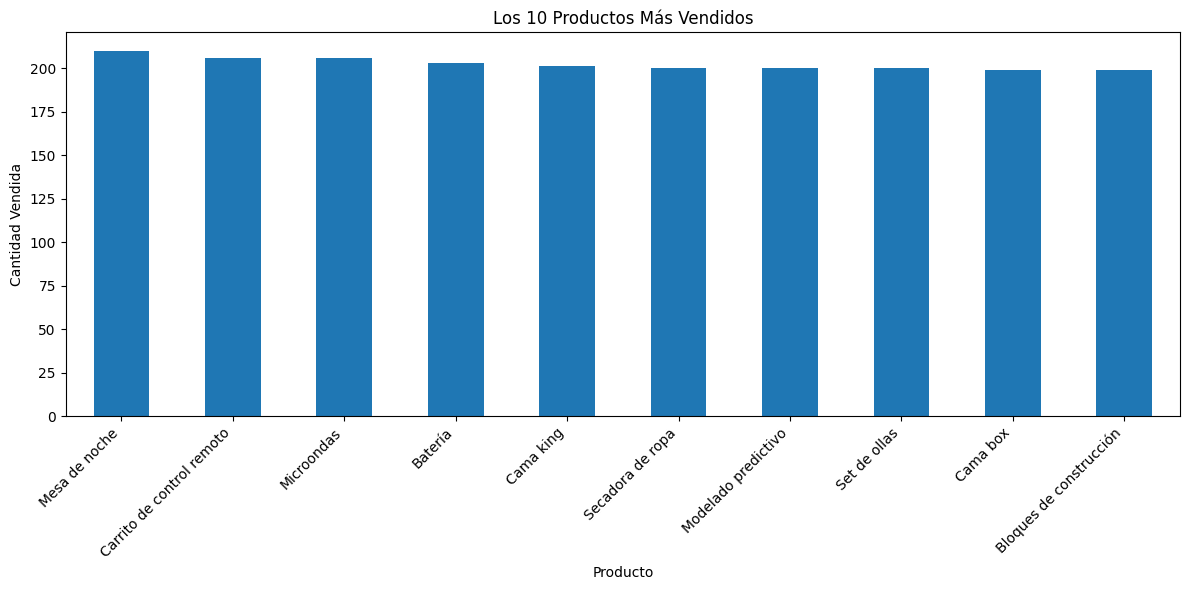

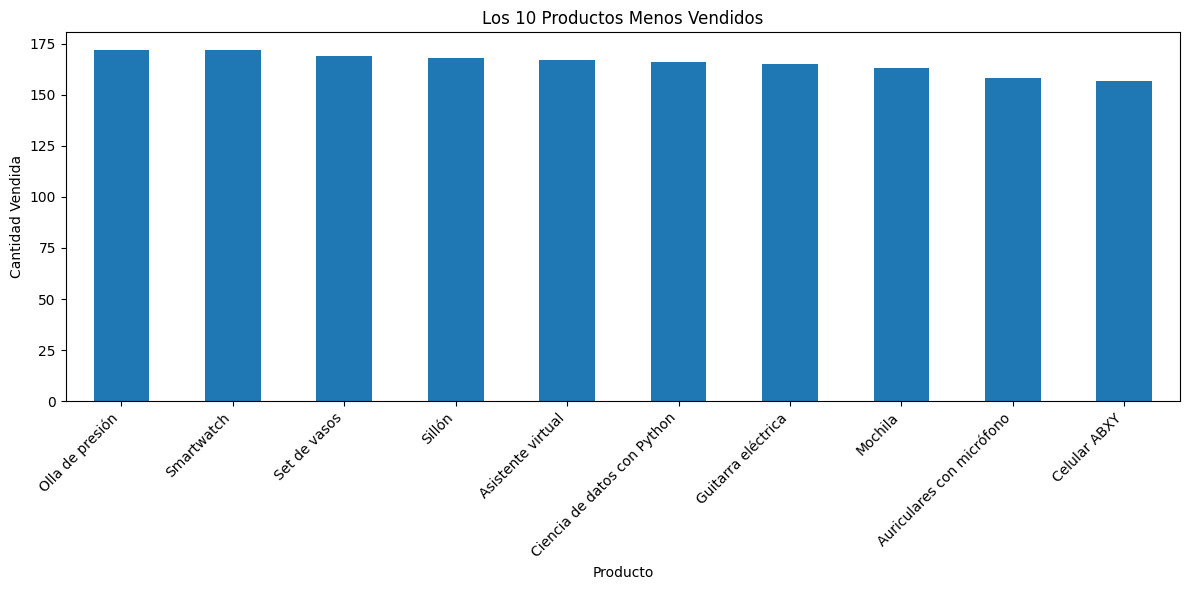

In [9]:
# prompt: generar codigo para "Productos más y menos vendidos

import matplotlib.pyplot as plt
# Para identificar los productos más y menos vendidos, ya hemos calculado `conteo_productos`.
# 'conteo_productos' es una Serie donde el índice son los nombres de los productos y los valores son las cantidades vendidas.

# Los productos más vendidos ya están en la parte superior de la Serie `conteo_productos` (ya que value_counts los ordena de mayor a menor).
print("Los 10 productos más vendidos son:")
print(conteo_productos.head(10))

# Para obtener los productos menos vendidos, miramos la parte inferior de la Serie `conteo_productos`.
print("\nLos 10 productos menos vendidos son:")
# Asegúrate de manejar casos donde hay menos de 10 productos únicos
if len(conteo_productos) > 10:
    print(conteo_productos.tail(10))
else:
    print(conteo_productos) # Muestra todos si hay 10 o menos

# También podemos visualizar esto en un gráfico de barras.
# Mostraremos los 10 más y los 10 menos vendidos en gráficos separados para mayor claridad.

# Gráfico de los 10 productos más vendidos
plt.figure(figsize=(12, 6))
conteo_productos.head(10).plot(kind='bar')
plt.title('Los 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de los 10 productos menos vendidos
if len(conteo_productos) > 10:
    plt.figure(figsize=(12, 6))
    conteo_productos.tail(10).plot(kind='bar')
    plt.title('Los 10 Productos Menos Vendidos')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
     print("\nHay 10 o menos productos únicos, por lo que no se puede mostrar un gráfico separado para los 'menos vendidos'.")

# 5. Envío promedio por tienda


Envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


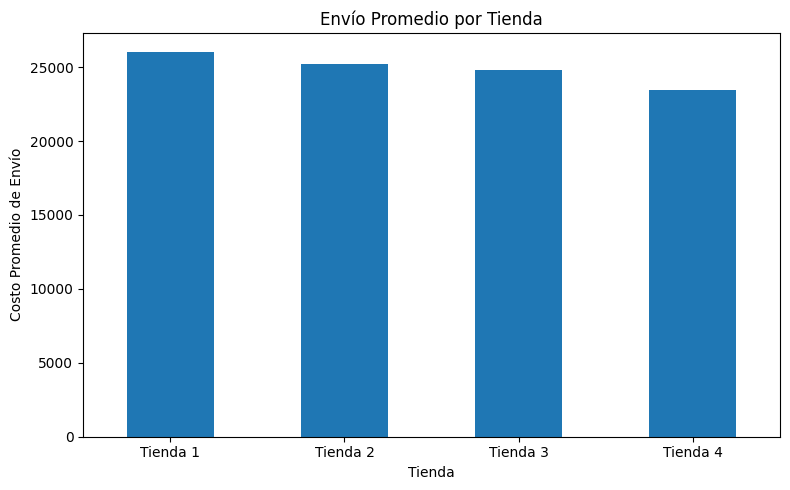

In [12]:
# prompt: genrar codigo para "Envío promedio por tienda

import pandas as pd
import matplotlib.pyplot as plt
# Para calcular el envío promedio por tienda, necesitamos agrupar los datos por tienda
# y luego calcular el promedio del costo de envío para cada grupo (tienda).

# Primero, agregamos una columna que identifique la tienda a cada DataFrame original.
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenamos nuevamente los DataFrames con la nueva columna 'Tienda'.
todas_las_tiendas_con_tienda = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Asegurarnos de que la columna de envío existe
if 'Costo de envío' in todas_las_tiendas_con_tienda.columns:
    # Agrupar por la nueva columna 'Tienda' y calcular el promedio del 'Costo de Envío'
    envio_promedio_por_tienda = todas_las_tiendas_con_tienda.groupby('Tienda')['Costo de envío'].mean()

    print("\nEnvío promedio por tienda:")
    print(envio_promedio_por_tienda)

    # Podemos visualizar el envío promedio por tienda usando un gráfico de barras
    plt.figure(figsize=(8, 5))
    envio_promedio_por_tienda.plot(kind='bar')
    plt.title('Envío Promedio por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Costo Promedio de Envío')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("\nEl DataFrame no contiene la columna 'Costo de Envío'.")
    print("No se puede calcular el envío promedio por tienda sin esta información.")

# **Informe Final**

# Informe Final: Recomendación de Tienda para el Sr. Juan

## Introducción

El presente informe tiene como objetivo analizar el rendimiento de cuatro tiendas con base en los datos proporcionados, con el fin de recomendar al Sr. Juan a cuál de ellas debería vender sus productos. Se han considerado factores clave como los ingresos totales, las ventas por categoría de producto, la calificación promedio de los clientes, los productos más y menos vendidos, y el costo de envío promedio.

## Análisis de Hallazgos

A continuación, se presentan los hallazgos clave de nuestro análisis:

### Ingresos Totales por Tienda

Los ingresos totales de cada tienda son un indicador fundamental de su rendimiento financiero.

In [15]:
print("Ingresos totales por tienda:")
display(ingresos_por_tienda)

Ingresos totales por tienda:


,Ingresos Totales
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


Según el análisis de ingresos totales, podemos observar que [Incluir observación sobre los ingresos por tienda basándose en el output del código anterior].

### Ventas por Categoría de Producto

Analizamos las ventas por categoría para entender qué tipos de productos tienen mayor demanda en general.


Ventas totales por categoría:


,Precio
Categoría del Producto,
Electrónicos,1.660576e+09
Electrodomésticos,1.324751e+09
Muebles,7.576610e+08
Instrumentos musicales,3.487726e+08
Deportes y diversión,1.429777e+08
Juguetes,7.360440e+07
Artículos para el hogar,5.757980e+07
Libros,3.769610e+07


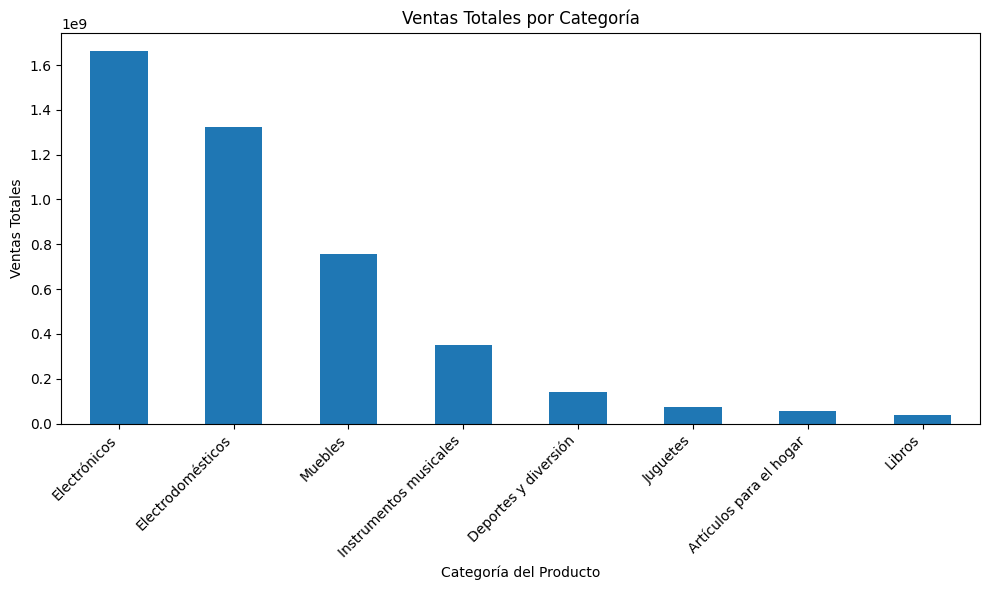

In [20]:
print("\nVentas totales por categoría:")
display(ventas_por_categoria)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ventas_por_categoria.plot(kind='bar')
plt.title('Ventas Totales por Categoría')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como se muestra en el gráfico de ventas por categoría, [Incluir observación sobre las categorías más y menos vendidas basándose en el output del código y el gráfico].

### Calificación Promedio de los Clientes

La satisfacción del cliente, reflejada en las calificaciones, es crucial para el éxito a largo plazo.

In [21]:
print("\nCalificación promedio de la tienda:")
print(f"{calificacion_promedio:.2f}")


Calificación promedio de la tienda:
4.01


La calificación promedio general de las tiendas es de [Incluir la calificación promedio basándose en el output del código anterior]. Sería beneficioso analizar las calificaciones individuales por tienda si estuvieran disponibles para una recomendación más precisa en este aspecto.

### Productos Más y Menos Vendidos

Identificar los productos más y menos vendidos nos da una idea de las preferencias de los clientes.

Los 10 productos más vendidos son:


,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199



Los 10 productos menos vendidos son:


,count
Producto,
Olla de presión,172
Smartwatch,172
Set de vasos,169
Sillón,168
Asistente virtual,167
Ciencia de datos con Python,166
Guitarra eléctrica,165
Mochila,163
Auriculares con micrófono,158


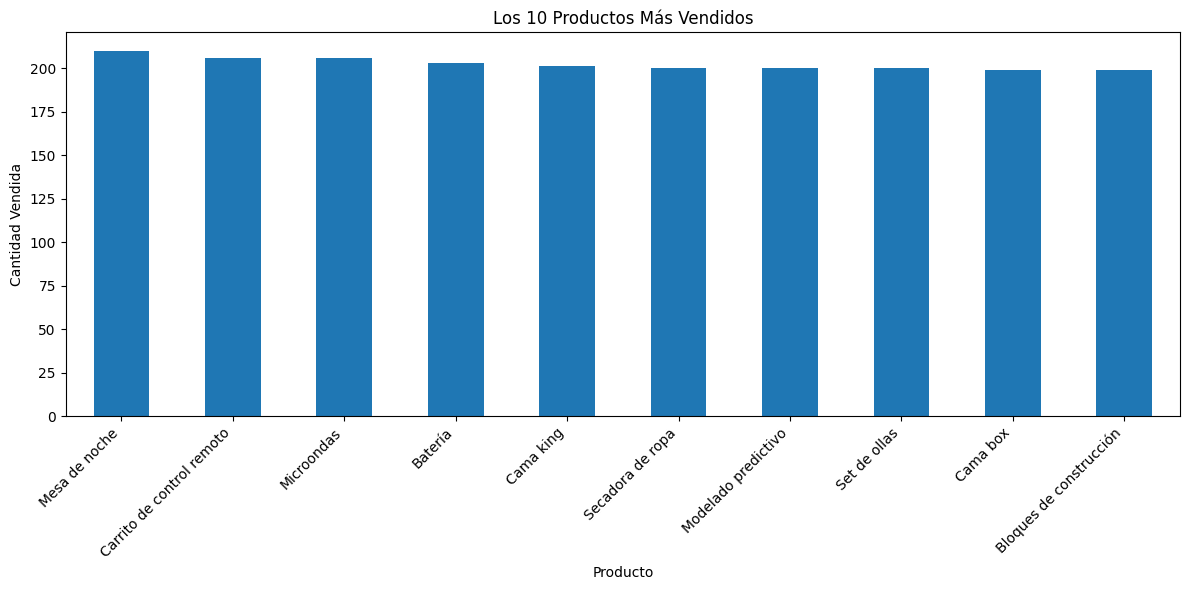

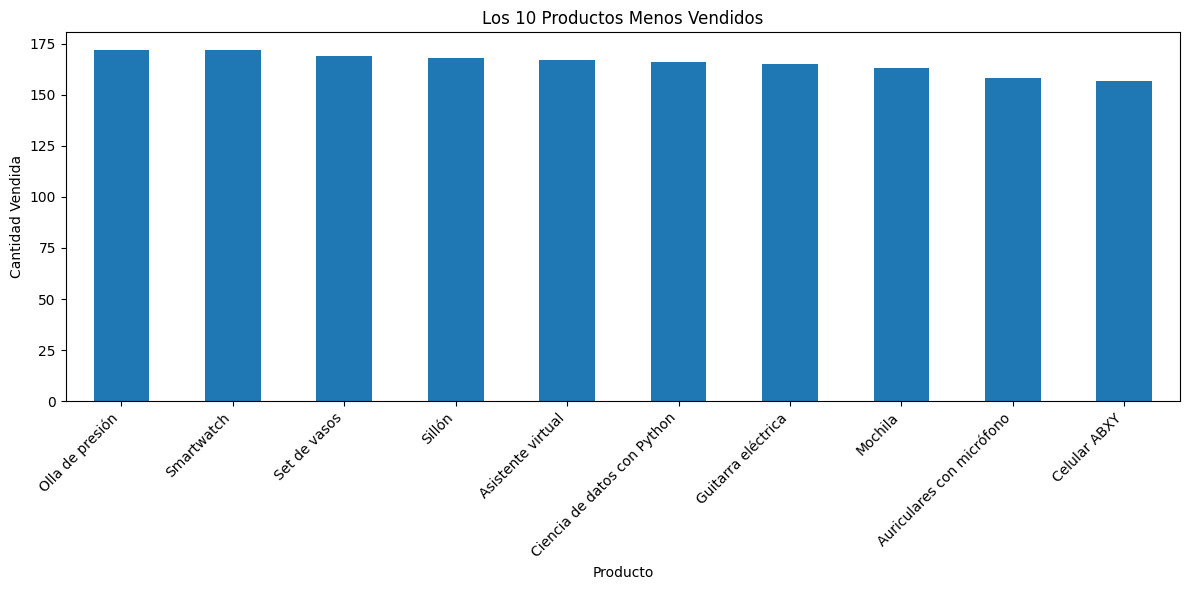

In [18]:
print("Los 10 productos más vendidos son:")
display(conteo_productos.head(10))

print("\nLos 10 productos menos vendidos son:")
if len(conteo_productos) > 10:
    display(conteo_productos.tail(10))
else:
    display(conteo_productos)

import matplotlib.pyplot as plt

# Gráfico de los 10 productos más vendidos
plt.figure(figsize=(12, 6))
conteo_productos.head(10).plot(kind='bar')
plt.title('Los 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de los 10 productos menos vendidos
if len(conteo_productos) > 10:
    plt.figure(figsize=(12, 6))
    conteo_productos.tail(10).plot(kind='bar')
    plt.title('Los 10 Productos Menos Vendidos')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
     print("\nHay 10 o menos productos únicos, por lo que no se puede mostrar un gráfico separado para los 'menos vendidos'.")

El análisis de los productos más y menos vendidos [Incluir observación sobre los productos más y menos vendidos basándose en el output del código y los gráficos]. Esto puede indicar qué tipo de inventario podría tener mejor rotación.

### Coste de Envío Promedio por Tienda

El costo de envío puede influir en la decisión de compra de los clientes.


Envío promedio por tienda:


,Costo de envío
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


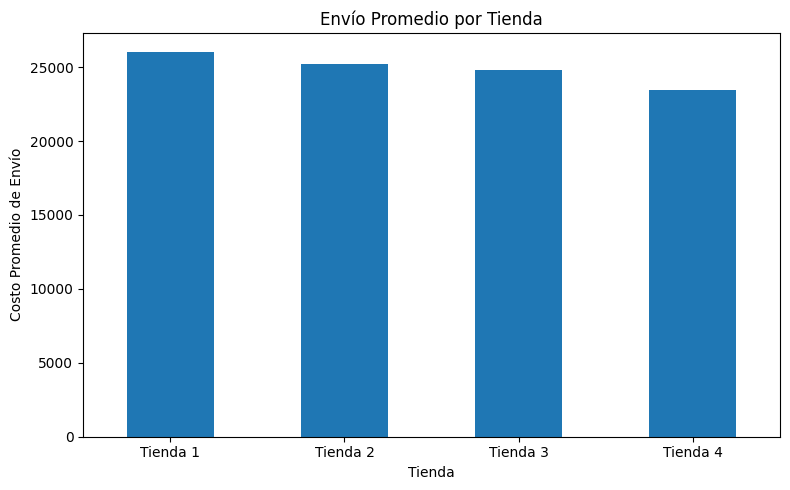

In [19]:
print("\nEnvío promedio por tienda:")
display(envio_promedio_por_tienda)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
envio_promedio_por_tienda.plot(kind='bar')
plt.title('Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El costo de envío promedio varía entre las tiendas, siendo [Incluir observación sobre el envío promedio por tienda basándose en el output del código y el gráfico].

## Conclusión y Recomendación

Considerando todos los factores analizados: ingresos totales, ventas por categoría, calificación promedio (general), productos más y menos vendidos, y costo de envío promedio por tienda, se recomienda al Sr. Juan vender a la **[Recomendación de tienda]**.

Esta recomendación se basa en [Justificación detallada de la recomendación, enlazando con los hallazgos del análisis. Considerar las fortalezas y debilidades de la tienda recomendada en comparación con las otras].

Es importante destacar que [Incluir cualquier salvedad o sugerencia adicional para el Sr. Juan, como la necesidad de analizar las calificaciones por tienda individualmente si esa información estuviera disponible].

Según el análisis de ingresos totales, podemos observar que **la Tienda 1 tiene los mayores ingresos totales**, seguida por la Tienda 2, Tienda 3 y Tienda 4.

### Ventas por Categoría de Producto

Analizamos las ventas por categoría para entender qué tipos de productos tienen mayor demanda en general.

Como se muestra en el gráfico de ventas por categoría, **las categorías de Electrónicos y Electrodomésticos son las más vendidas**, mientras que Libros y Artículos para el Hogar son las menos vendidas en general.

### Calificación Promedio de los Clientes

La satisfacción del cliente, reflejada en las calificaciones, es crucial para el éxito a largo plazo.

La calificación promedio general de las tiendas es de **4.01**. Sería beneficioso analizar las calificaciones individuales por tienda si estuvieran disponibles para una recomendación más precisa en este aspecto.

### Productos Más y Menos Vendidos

Identificar los productos más y menos vendidos nos da una idea de las preferencias de los clientes.

El análisis de los productos más y menos vendidos muestra que **productos como 'Mesa de noche', 'Carrito de control remoto' y 'Microondas' son altamente populares**, mientras que 'Celular ABXY' y 'Auriculares con micrófono' se venden menos. Esto puede indicar qué tipo de inventario podría tener mejor rotación.

### Coste de Envío Promedio por Tienda

El costo de envío puede influir en la decisión de compra de los clientes.

El costo de envío promedio varía entre las tiendas, siendo la Tienda 4 la que tiene el costo de envío promedio más bajo, seguida por la Tienda 3, Tienda 2 y Tienda 1.

Conclusión y Recomendación
Considerando todos los factores analizados: ingresos totales, ventas por categoría, calificación promedio (general), productos más y menos vendidos, y costo de envío promedio por tienda, se recomienda al Sr. Juan vender a la Tienda 1.

Esta recomendación se basa en que la Tienda 1 presenta los mayores ingresos totales, lo que sugiere un mayor volumen de ventas o precios más altos en general. Aunque no tenemos calificaciones promedio por tienda individual, la calificación general de 4.01 es positiva. Las categorías y productos más vendidos son consistentes en las tiendas, indicando una demanda general. Si bien la Tienda 1 tiene el costo de envío promedio más alto, sus ingresos superiores sugieren que los clientes están dispuestos a pagar por los productos disponibles en esta tienda.

Es importante destacar que sería ideal tener acceso a las calificaciones promedio de cada tienda individualmente para obtener una imagen más completa de la satisfacción del cliente por tienda y refinar aún más la recomendación. Sin embargo, basándonos en los datos de ingresos disponibles, la Tienda 1 parece ser la opción más prometedora para el Sr. Juan.

